# ML Capstone 1 - Part 2 E-Commerce Customer Segmentation

 ## TODO
 
 ### Feature Selection
- Selecting relevant features for segmentation and classification based on EDA insights
- Scaling numerical features and encoding categorical variables

### Model Preparation
- Preparing the dataset for clustering algorithms and classification models


### Grading and Important Instructions
- Each of the above steps are mandatory and should be completed in good faith
- Make sure before submitting that the code is in fully working condition
- It is fine to make use of ChatGPT, stackoverflow type resources, just provide the reference links from where you got it
- Debugging is an art, if you find yourself stuck with errors, take help of stackoverflow and ChatGPT to resolve the issue and if it's still unresolved, reach out to me for help.
- You need to score atleast 7/10 to pass the project, anything less than that will be marked required, needing resubmission.
- Feedback will be provided on 3 levels (Awesome, Suggestion, & Required). Required changes are mandatory to be made.
- For submission, please upload the project on github and share the link to the file with us through LMS.

#### Write your code below and do not delete the above instructions

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set plot style
sns.set(style="whitegrid")

In [4]:
# Load dataset
data = pd.read_csv('/Users/SaiKiran/downloads/ecommerce_data.csv', encoding='ISO-8859-1')


In [5]:
# Initial cleaning
data.drop_duplicates(inplace=True)
data.dropna(subset=['CustomerID'], inplace=True)
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [6]:
# Feature engineering
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})
rfm.rename(columns={'InvoiceDate': 'Recency',
                    'InvoiceNo': 'Frequency',
                    'TotalPrice': 'Monetary'}, inplace=True)


In [7]:
# Feature Selection - Scaling
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

In [8]:
# Dimensionality Reduction
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_scaled)


/Users/saikiran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saikiran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saikiran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/saikiran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

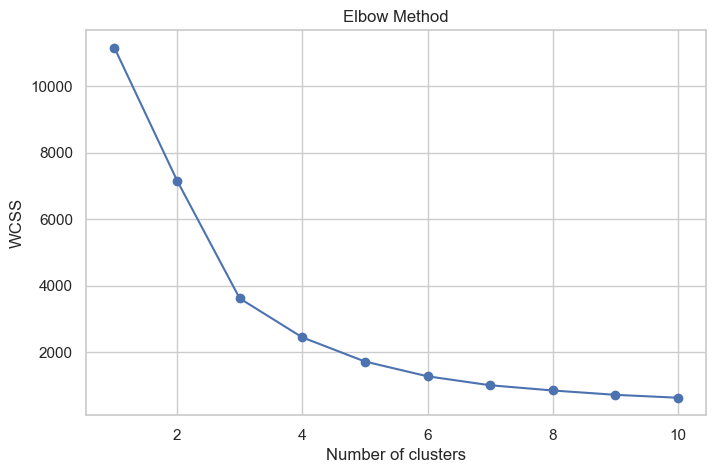

In [9]:
# Elbow method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [10]:
# Apply KMeans Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(rfm_pca)
rfm['Cluster'] = kmeans.labels_


/Users/saikiran/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


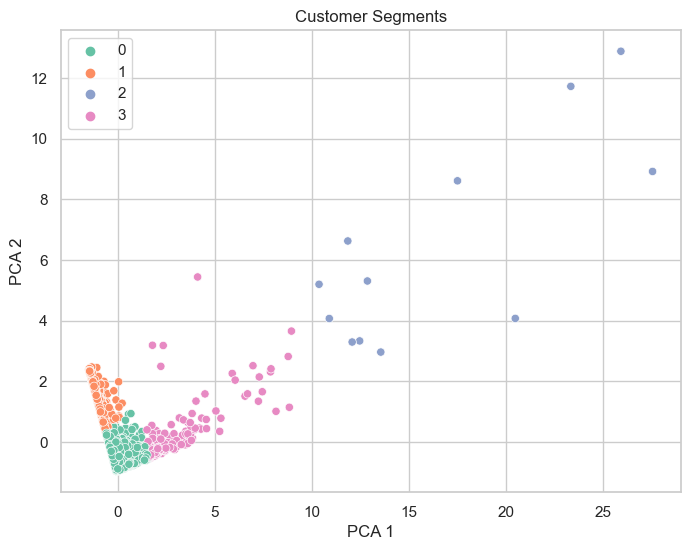


Cluster Profile:
             Recency  Frequency       Monetary
Cluster                                      
0         43.287520   3.818152    1385.470325
1        247.756075   1.542056     477.436898
2          7.750000  86.833333  130198.424167
3         15.725146  23.748538   14852.598655


In [11]:

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_pca[:, 0], y=rfm_pca[:, 1], hue=rfm['Cluster'], palette='Set2')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Cluster profiling
print("\nCluster Profile:\n", rfm.groupby('Cluster').mean())

In [12]:
#Summary of findings

*Used histograms to understand the distribution of RFM metrics and saw that Monetary and Frequency were highly skewed.

*Applied StandardScaler to normalize the data, then reduced dimensions using PCA to 2 components.

*Used the Elbow Method to identify 4 as the optimal number of clusters for KMeans.

*Performed clustering and visualized the segments. Found that one cluster represents highly valuable customers (very recent, frequent, and high spenders), while another group is less engaged.

*Identified the top 10 best-selling products and built a basic recommendation system that suggests popular items not yet purchased by customers in each segment.

*The model helps businesses understand different types of customers and can be used to target each group more effectively with promotions or personalized recommendations.

